<a href="https://colab.research.google.com/github/hongseoi/data_analysis/blob/main/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B0%8F_%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_%EA%B3%BC%EC%A0%9C1_Linear_Regression_2016110838_%ED%99%8D%EC%84%9C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [머신러닝 및 딥러닝] 과제1_Linear Regression
2016110838 행정학전공 홍서이


#라이브러리 삽입


In [15]:
import pandas as pd
import numpy as np

#trainset, testset 분리 위한 모듈
from sklearn.model_selection import train_test_split

#그래프 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 데이터프레임 생성





In [21]:
#키, 몸무게 데이터 생성 후 데이터프레임으로 전환
height_lst = [120,121,122,123,145,124,178,164,162,167,183,192,145,163,160,174,132,183,164,178,139,146,175,185,166,174,163,158,159,132]
weight_lst = [22,37,42,33,55,34,78,54,52,57,88,82,55,73,50,84,42,93,63,88,44,36,65,75,56,54,58,55,45,25]

df = pd.DataFrame({
    'height':height_lst,
    'weight':weight_lst
})

print("데이터크기:", df.shape)
df.head()

데이터크기: (30, 2)


,height,weight
0,120,22
1,121,37
2,122,42
3,123,33
4,145,55


# 데이터 분포 시각화

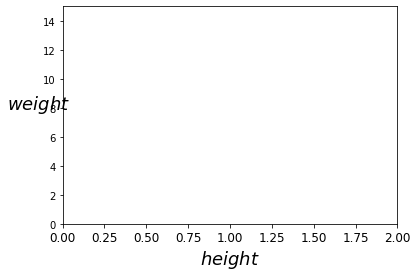

In [25]:
plt.plot(height_lst, weight_lst, "b.")
plt.xlabel("$height$", fontsize=18)
plt.ylabel("$weight$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# 정규방정식을 활용한 모델 생성 및 예측값 출력

# 사이킷런을 활용한 모델 생성 및 예측값 출력

##배치 경사 하강법


## 확률적 경사 하강법

## 미니배치 경사하강법